In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


import scipy as sp

In [3]:
noaa_tim = pd.read_csv('../../measurements/NOAA/historical/summary_eri.csv', skiprows=7)
noaa_tim['Date      '] = pd.to_datetime(noaa_tim['Date      '], format='%Y-%m-%d', errors='coerce')
noaa_tim['year'] = noaa_tim['Date      '].dt.year
noaa_tim['OvrLkRunof'] = pd.to_numeric(noaa_tim['OvrLkRunof'], errors='coerce')
noaa_tim['OvrLkPrecp'] = pd.to_numeric(noaa_tim['OvrLkPrecp'], errors='coerce')
noaa_tim[' Evaporatn'] = pd.to_numeric(noaa_tim[' Evaporatn'], errors='coerce')
noaa_tim['OvrLkATAvg'] = pd.to_numeric(noaa_tim['OvrLkATAvg'], errors='coerce')
noaa_tim['OvrLdRunof'] = pd.to_numeric(noaa_tim['OvrLdRunof'], errors='coerce')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (1,3,5,9,10,11,12,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


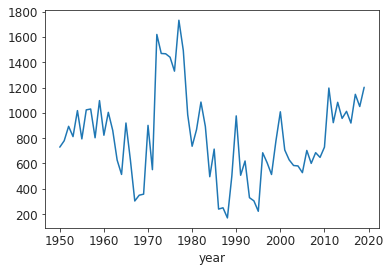

In [4]:
(noaa_tim.groupby('year').mean()*365).OvrLkPrecp.plot()

In [5]:
Precip_mm = pd.read_excel('../../measurements/glerl/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [6]:
StClair_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_StClair.csv')
CentralBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_CentralBasin.csv')
EasternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_EasternBasin.csv')
WesternBasin_ERA5 = pd.read_csv('../../measurements/ERA5/ERA5_daily_reanalysis_LakeErie_WesternBasin.csv')

StClair_ERA5['evap'] = -StClair_ERA5['evap']
CentralBasin_ERA5['evap'] = -CentralBasin_ERA5['evap']
EasternBasin_ERA5['evap'] = -EasternBasin_ERA5['evap']
WesternBasin_ERA5['evap'] = -WesternBasin_ERA5['evap']

StClair_ERA5['precip'] = pd.to_numeric(StClair_ERA5['precip'], errors='coerce')


StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')


# CentralBasin_ERA5.describe()

for c in StClair_ERA5.columns[1:]:
    StClair_ERA5[c] = StClair_ERA5[c] * (StClair_ERA5[c] > 0)

StClair_ERA5['date'] = pd.to_datetime(StClair_ERA5['date'], errors='coerce')
StClair_ERA5['year'] = StClair_ERA5.date.dt.year

StClair_ERA5['precip'] = StClair_ERA5['precip'] * (StClair_ERA5['precip'] < 300)
# StClair_ERA5['precip']

StClair_ERA5 = StClair_ERA5.groupby(['year']).mean()

StClair_ERA5['precip'] = StClair_ERA5['precip']*365

StClair_ERA5['evap'] = StClair_ERA5['evap']*365
StClair_ERA5['surf_runoff'] = StClair_ERA5['evap']*365

StClair_ERA5

for c in WesternBasin_ERA5.columns[1:]:
    WesternBasin_ERA5[c] = WesternBasin_ERA5[c] * (WesternBasin_ERA5[c] > 0)

WesternBasin_ERA5['date'] = pd.to_datetime(WesternBasin_ERA5['date'], errors='coerce')
WesternBasin_ERA5['year'] = WesternBasin_ERA5.date.dt.year
WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip'] * (WesternBasin_ERA5['precip'] < 300)
WesternBasin_ERA5 = WesternBasin_ERA5.groupby(['year']).mean()

WesternBasin_ERA5['precip'] = WesternBasin_ERA5['precip']*365

WesternBasin_ERA5['evap'] = WesternBasin_ERA5['evap']*365
WesternBasin_ERA5['surf_runoff'] = WesternBasin_ERA5['surf_runoff']*365

WesternBasin_ERA5

CentralBasin_ERA5['date'] = pd.to_datetime(CentralBasin_ERA5['date'], errors='coerce')
CentralBasin_ERA5['year'] = CentralBasin_ERA5.date.dt.year
CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip'] * (CentralBasin_ERA5['precip'] < 300)
CentralBasin_ERA5 = CentralBasin_ERA5.groupby(['year']).mean()

CentralBasin_ERA5['precip'] = CentralBasin_ERA5['precip']*365

CentralBasin_ERA5['evap'] = CentralBasin_ERA5['evap']*365
CentralBasin_ERA5['surf_runoff'] = CentralBasin_ERA5['surf_runoff']*365

CentralBasin_ERA5

EasternBasin_ERA5['date'] = pd.to_datetime(EasternBasin_ERA5['date'], errors='coerce')
EasternBasin_ERA5['year'] = EasternBasin_ERA5.date.dt.year
EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip'] * (EasternBasin_ERA5['precip'] < 300)
EasternBasin_ERA5 = EasternBasin_ERA5.groupby(['year']).mean()

EasternBasin_ERA5['precip'] = EasternBasin_ERA5['precip']*365

EasternBasin_ERA5['evap'] = EasternBasin_ERA5['evap']*365
EasternBasin_ERA5['surf_runoff'] = EasternBasin_ERA5['surf_runoff']*365

EasternBasin_ERA5

,precip,cloud,evap,surf_runoff
year,,,,
2002,1178.447569,0.633663,1007.126395,36.716290
2003,1308.058189,0.632510,826.207540,53.437211
2004,1380.441624,0.657704,862.345166,64.497484
2005,1230.700936,0.602625,930.739827,30.358819
2006,1417.667565,0.631710,884.901199,49.570669
2007,1120.446201,0.590235,941.776782,38.961618
2008,1455.857457,0.628582,929.046742,52.575188
2009,1256.445394,0.628541,866.088578,327.794992
2010,1208.589299,0.603255,957.884606,37.934856


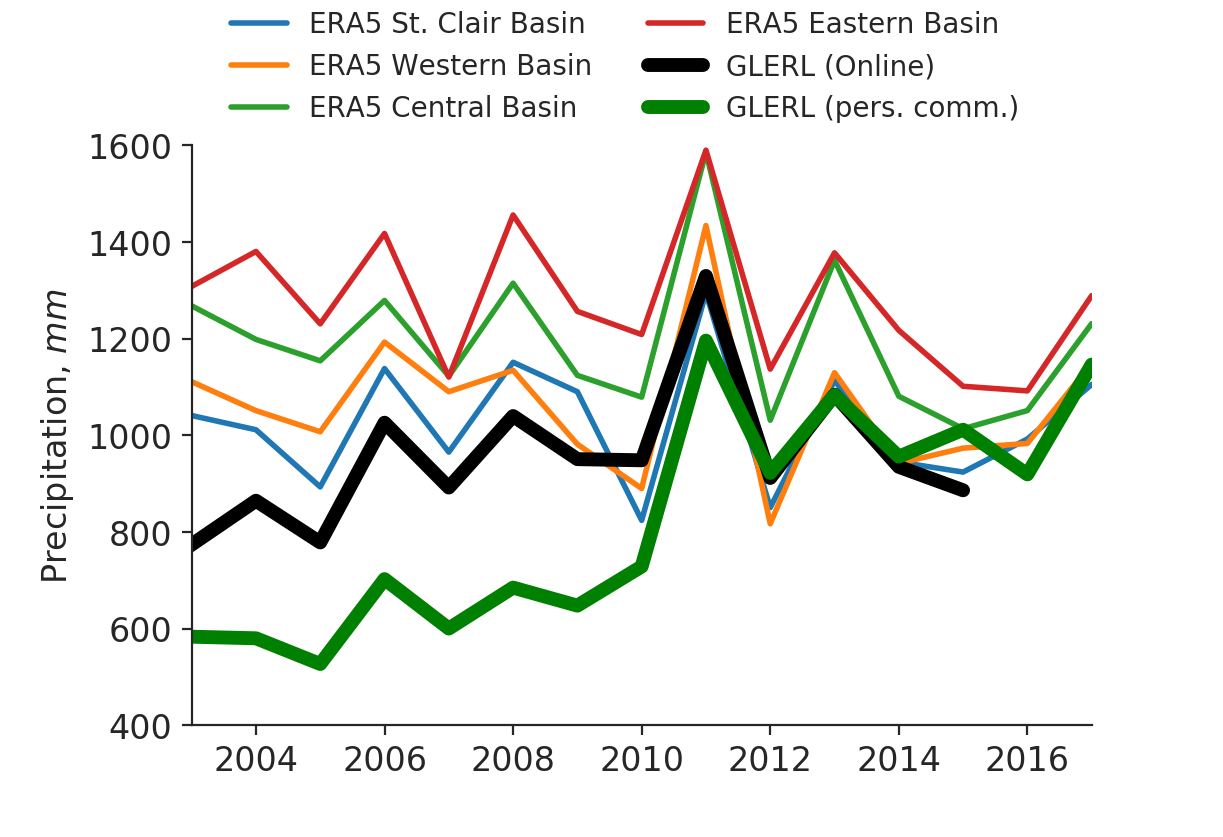

In [11]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True, constrained_layout=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.precip, c=sns.color_palette()[0], lw=2, label='ERA5 St. Clair Basin')
axes.plot(StClair_ERA5.index, WesternBasin_ERA5.precip, c=sns.color_palette()[1], lw=2, label='ERA5 Western Basin')
axes.plot(StClair_ERA5.index, CentralBasin_ERA5.precip, c=sns.color_palette()[2], lw=2, label='ERA5 Central Basin')
axes.plot(StClair_ERA5.index, EasternBasin_ERA5.precip, c=sns.color_palette()[3], lw=2, label='ERA5 Eastern Basin')


# ax2 = axes.twinx()
# ax2.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax2.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax2.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax2.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax2.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# ax2.set_yticks([])

axes.plot(Precip_mm.Year, Precip_mm.Total, c='k', lw=5, label='GLERL (Online)')


axes.plot((noaa_tim.groupby('year').mean()*365).OvrLkPrecp, c='g', lw=5, label='GLERL (pers. comm.)')

# ax3 = ax2.twinx()
# ax3.plot(StClair_ERA5.index, StClair_ERA5.surf_runoff, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax3.plot(StClair_ERA5.index, WesternBasin_ERA5.surf_runoff, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax3.plot(StClair_ERA5.index, CentralBasin_ERA5.surf_runoff, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax3.plot(StClair_ERA5.index, EasternBasin_ERA5.surf_runoff, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax3.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# # ax3.set_yticks([])

# axes.legend(title='Precipitation', loc=1, frameon=1, framealpha=0.4, fontsize='small')
axes.set_xlabel('')
# axes.grid(lw=0.5)
sns.despine()
# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylim(400,1600)
# axes.set_ylim(0,3000)
# ax3.set_ylim(0,3000)
axes.set_ylabel('Precipitation, $mm$')

handles, labels = axes.get_legend_handles_labels()
f.legend( handles, labels, loc = (0.18, 0.84), ncol=2, frameon=0, framealpha=0.5, fontsize='small')

plt.subplots_adjust(top=0.85, left=0.15)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precip_analysis.pdf', dpi=f.dpi)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/precip_analysis.pdf', dpi=f.dpi)

In [12]:
Evap_mm = pd.read_excel('../../measurements/glerl/Evaporation.xlsx', sheetname='ERI', skiprows=3)

In [13]:
Evap_mm['Ann'] = pd.to_numeric(Evap_mm['Ann'], errors='coerce')
Evap_mm['Year'] = pd.to_numeric(Evap_mm['Year'], errors='coerce')

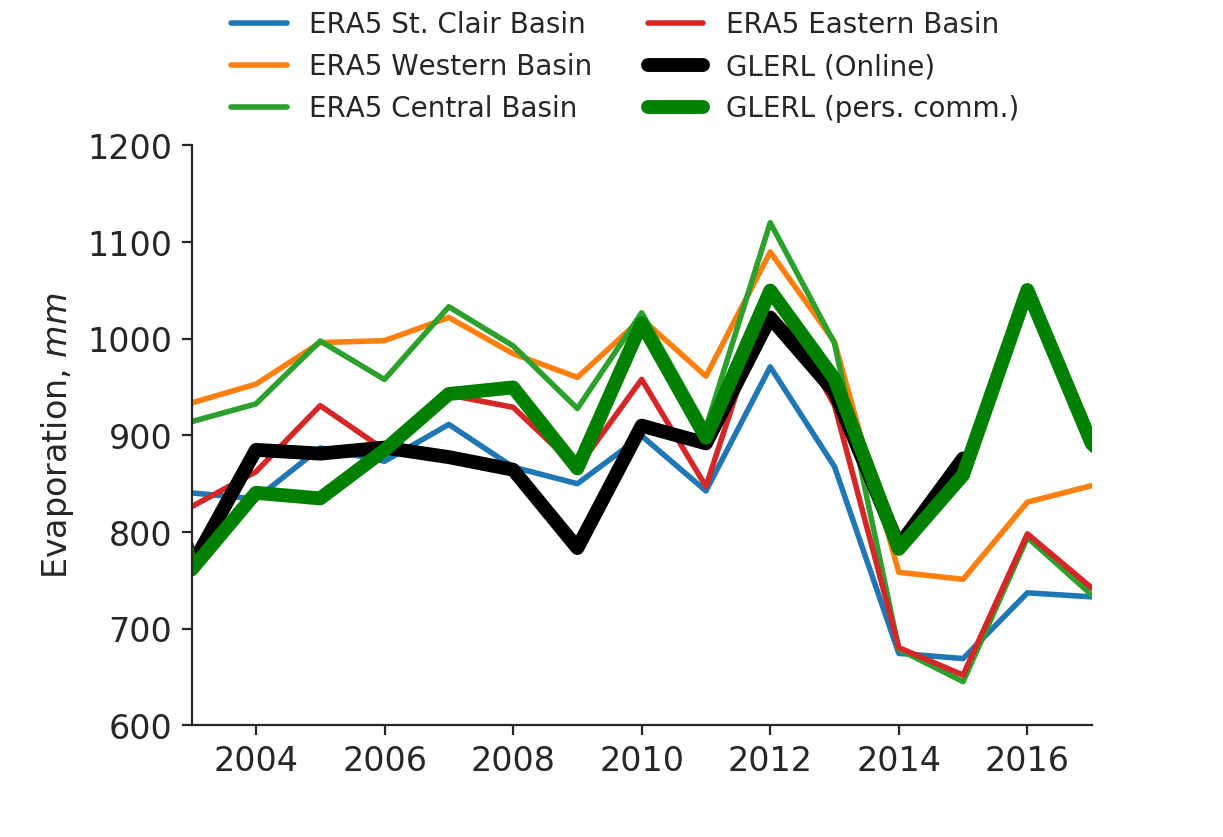

In [15]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True, constrained_layout=True)

axes.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], lw=2, label='ERA5 St. Clair Basin')
axes.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], lw=2, label='ERA5 Western Basin')
axes.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], lw=2, label='ERA5 Central Basin')
axes.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], lw=2, label='ERA5 Eastern Basin')


# ax2 = axes.twinx()
# ax2.plot(StClair_ERA5.index, StClair_ERA5.evap, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax2.plot(StClair_ERA5.index, WesternBasin_ERA5.evap, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax2.plot(StClair_ERA5.index, CentralBasin_ERA5.evap, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax2.plot(StClair_ERA5.index, EasternBasin_ERA5.evap, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax2.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# ax2.set_yticks([])

axes.plot(Evap_mm.Year, Evap_mm.Ann, c='k', lw=5, label='GLERL (Online)')


axes.plot((noaa_tim.groupby('year').mean()*365)[' Evaporatn'], c='g', lw=5, label='GLERL (pers. comm.)')

# ax3 = ax2.twinx()
# ax3.plot(StClair_ERA5.index, StClair_ERA5.surf_runoff, c=sns.color_palette()[0], ls='-.', lw=1, label='St. Clair Basin')
# ax3.plot(StClair_ERA5.index, WesternBasin_ERA5.surf_runoff, c=sns.color_palette()[1], ls='-.', lw=1, label='Western Basin')
# ax3.plot(StClair_ERA5.index, CentralBasin_ERA5.surf_runoff, c=sns.color_palette()[2], ls='-.', lw=1, label='Central Basin')
# ax3.plot(StClair_ERA5.index, EasternBasin_ERA5.surf_runoff, c=sns.color_palette()[3], ls='-.', lw=1, label='Eastern Basin')
# ax3.legend(title='Evaporation', loc=2, frameon=1, framealpha=1, fontsize='small')
# # ax3.set_yticks([])

# axes.legend(title='Precipitation', loc=1, frameon=1, framealpha=0.4, fontsize='small')
axes.set_xlabel('')
# axes.grid(lw=0.5)
sns.despine()
# axes.set_ylim(0,None)
axes.set_xlim(2003,2017)
axes.set_ylim(600,1200)
# axes.set_ylim(0,3000)
# ax3.set_ylim(0,3000)
axes.set_ylabel('Evaporation, $mm$')

handles, labels = axes.get_legend_handles_labels()
f.legend( handles, labels, loc = (0.18, 0.84), ncol=2, frameon=0, framealpha=0.5, fontsize='small')

plt.subplots_adjust(top=0.85, left=0.15)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/evap_analysis.pdf', dpi=f.dpi)
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/evap_analysis.pdf', dpi=f.dpi)



# Average precipitation 1980-2017

In [30]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600


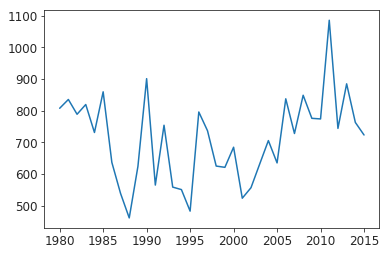

In [38]:
plt.plot(Precip_mm.Year[80:], conversion_fac_mmy_to_cms*Precip_mm.Total[80:])
# plt.xlim(1985, 1990)

In [36]:
Precip_mm.Total[80:].describe()

count      39.00000
mean      875.20410
std       182.53718
min       565.87000
25%       763.28500
50%       892.06000
75%       982.38000
max      1329.75000
Name: Total, dtype: float64

In [62]:
764/conversion_fac_mmy_to_cms

687.2162834058421

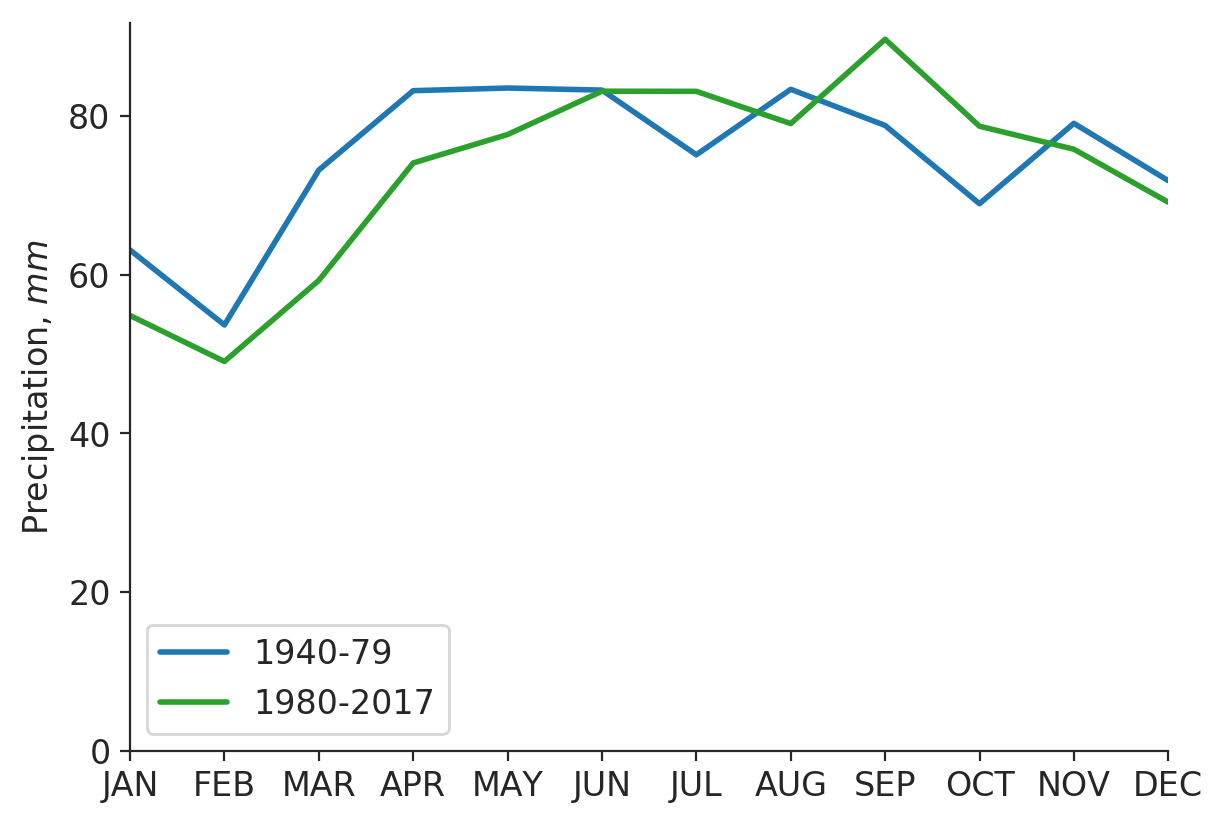

In [18]:
f, axes = plt.subplots(1,1, figsize=(6,4), dpi=200, sharex=True, constrained_layout=True)
axes.plot(Precip_mm[(Precip_mm.Year>1939) & (Precip_mm.Year<1980)].mean()[1:-1], label='1940-79', lw=2)
axes.plot(Precip_mm[(Precip_mm.Year>1979) & (Precip_mm.Year<2017)].mean()[1:-1], label='1980-2017', lw=2,  c=sns.color_palette()[2])
axes.set_ylabel('Precipitation, $mm$')
# axes.grid(lw=0.3)
sns.despine()
axes.legend()
axes.set_xlim(0,11)
axes.set_ylim(0,None)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/precip_monthly_1940.pdf', dpi=f.dpi)
f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/precip_monthly_1940.pdf', dpi=f.dpi)

